In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

fname = '/Users/alicebrindley/OneDrive - University of Exeter/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)
print(cube)

siconc=cube[2] 
print(siconc)

0: longitude / (degrees)               (latitude: 180; longitude: 360)
1: latitude / (degrees)                (latitude: 180; longitude: 360)
2: sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all ce

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


In [3]:

#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(siconc, 'time', name='month_number2')
cube2 = siconc[np.where((siconc.coord('month_number2').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season


<iris 'Cube' of sea_ice_area_fraction / (%) (time: 86; latitude: 180; longitude: 360)>

DimCoord([2017-12-16 12:00:00], bounds=[[2017-12-01 00:00:00, 2018-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time', attributes={'calendar_type': 'noleap', 'description': 'Temporal mean'})
DimCoord([2021-12-16 12:00:00], bounds=[[2021-12-01 00:00:00, 2022-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time', attributes={'calendar_type': 'noleap', 'description': 'Temporal mean'})
DimCoord([2025-12-16 12:00:00], bounds=[[2025-12-01 00:00:00, 2026-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time', attributes={'calendar_type': 'noleap', 'description': 'Temporal mean'})
DimCoord([2029-12-16 12:00:00], bounds=[[2029-12-01 00:00:00, 2030-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time', attributes={'calendar_type': 'noleap', 'description': 'Temporal mean'})
DimCoord([2032-12-16 12:00:00], bounds=[[2032-12-01 00:00:00, 20

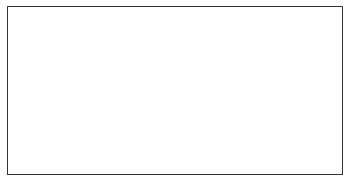

In [41]:
#identify the Ross Sea
#start of the loop
for i in range (0,2101-2015):
    cube3=cube2[i,:,:]
    west = -230
    east = -110
    south = -85
    north = -65
    temporary_cube = cube3.intersection(longitude = (west, east)) 
    regional_cube = temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    #my_plot = iplt.contourf(regional_cube)
    #plt.gca().gridlines(draw_labels=True)
    #plt.show()


# most northerly row of cells and have a criteria like the average sea ice
# row is > 80% (might need some testing/iterating to find the right number
#extract the latitude I want to work with
    north_edge = regional_cube.extract(iris.Constraint(latitude=-70))
    #average across this latitude
    nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    #print(nE_mean.data)
    
    if nE_mean.data >=65:
        #define siconc for polynya
        polynya_threshold=regional_cube.data
        polynya = np.where((polynya_threshold.data <=20) & (nE_mean.data >=65))
        #print(polynya)
        polynya = polynya_threshold.data
        #plt.pcolormesh(polynya_threshold.data,vmin=0,vmax=100)
        #plt.show()


        #define a variable to hold the threshold number you are interested in
        polynya_threshold_value = 30.0
        #Take a copy of the seaice data that we are going to use to make a binary 'mask' showing presence of absense of polynyas as 1s and 0s
        polynya_location = polynya_threshold.data.copy()
        #set that land data in this mask to nan (Not a number) so we don;t get confused (these will show up white in a typical plot)
        polynya_location[np.where(polynya_location >= 1.0e9)] = np.nan
        #make water that has more ice than our polynia condition equal to zero.
        polynya_location[np.where((polynya_location <= 100.0) & (polynya_location > polynya_threshold_value))] = 0.0
        #make water that has less ice than our polynia condition equal to zero to make where the polynya is
        polynya_location[np.where((polynya_location > 0.0) & (polynya_location <= polynya_threshold_value))] = 1.0
        #plot this data
        #plt.pcolormesh(polynya_location,vmin=0,vmax=1)
        #plt.show()
        #Note in this 1st situation, we have not tested to make sure the northern edge has >30% seaice and it has not, so it is eroniously identify
    else:
        print(cube3.coord('time'))

In [7]:
fgname = ('/Users/alicebrindley/Downloads/fgco2_9.2.22/outfile')
fgcube = iris.load(fgname)
print(fgcube)

fgcube1=fgcube[0] 
print(fgcube1)

0: surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; latitude: 180; longitude: 360)
surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                                                                         x               -               -
        latitude                                                                     -               x               -
        longitude                                                                    -               -               x
    Cell methods:
        mean where sea                                                          area
        mean                                                                    time
    Attributes:
        CDI                                                                     Climate Data Interface version 2.0.3 (https://mpimet.mpg.de/cdi)
        CDO     

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


In [8]:
#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(fgcube1, 'time', name='month_number1')
fgcube2 = fgcube1[np.where((fgcube1.coord('month_number1').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(fgcube2, 'time', name='season_year')
#then average by the season year:
fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season



<iris 'Cube' of surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 86; latitude: 180; longitude: 360)>

DimCoord([2015-12-16 12:00:00], bounds=[[2015-12-01 00:00:00, 2016-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


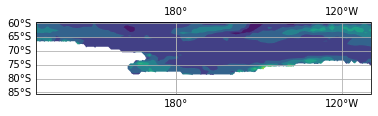

DimCoord([2016-12-16 12:00:00], bounds=[[2016-12-01 00:00:00, 2017-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


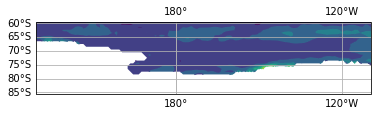

DimCoord([2017-12-16 12:00:00], bounds=[[2017-12-01 00:00:00, 2018-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


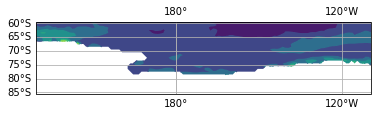

DimCoord([2018-12-16 12:00:00], bounds=[[2018-12-01 00:00:00, 2019-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


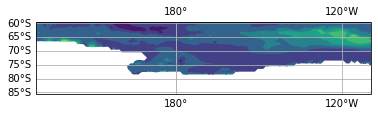

DimCoord([2019-12-16 12:00:00], bounds=[[2019-12-01 00:00:00, 2020-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


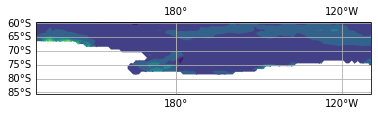

DimCoord([2020-12-16 12:00:00], bounds=[[2020-12-01 00:00:00, 2021-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


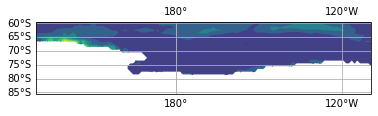

DimCoord([2021-12-16 12:00:00], bounds=[[2021-12-01 00:00:00, 2022-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


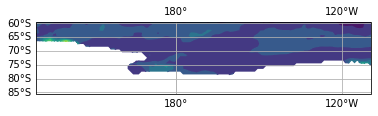

DimCoord([2022-12-16 12:00:00], bounds=[[2022-12-01 00:00:00, 2023-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


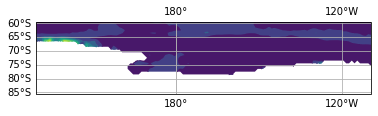

DimCoord([2023-12-16 12:00:00], bounds=[[2023-12-01 00:00:00, 2024-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


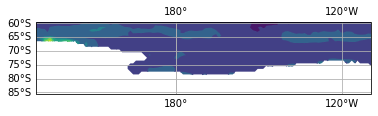

DimCoord([2024-12-16 12:00:00], bounds=[[2024-12-01 00:00:00, 2025-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


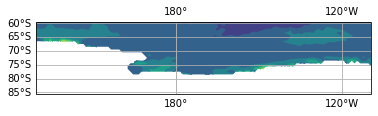

DimCoord([2025-12-16 12:00:00], bounds=[[2025-12-01 00:00:00, 2026-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


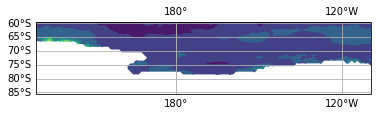

DimCoord([2026-12-16 12:00:00], bounds=[[2026-12-01 00:00:00, 2027-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


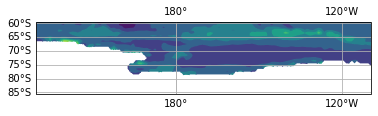

DimCoord([2027-12-16 12:00:00], bounds=[[2027-12-01 00:00:00, 2028-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


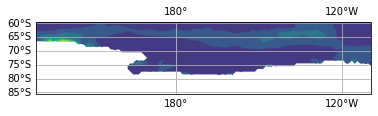

DimCoord([2028-12-16 12:00:00], bounds=[[2028-12-01 00:00:00, 2029-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


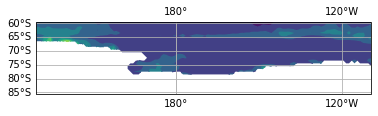

DimCoord([2029-12-16 12:00:00], bounds=[[2029-12-01 00:00:00, 2030-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


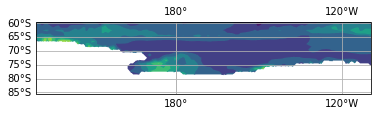

DimCoord([2030-12-16 12:00:00], bounds=[[2030-12-01 00:00:00, 2031-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


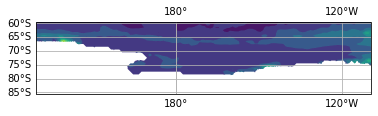

DimCoord([2031-12-16 12:00:00], bounds=[[2031-12-01 00:00:00, 2032-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


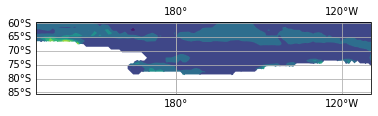

DimCoord([2032-12-16 12:00:00], bounds=[[2032-12-01 00:00:00, 2033-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


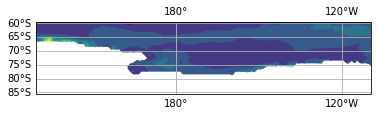

DimCoord([2033-12-16 12:00:00], bounds=[[2033-12-01 00:00:00, 2034-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


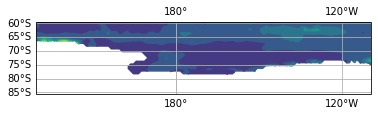

DimCoord([2034-12-16 12:00:00], bounds=[[2034-12-01 00:00:00, 2035-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


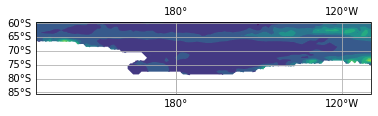

DimCoord([2035-12-16 12:00:00], bounds=[[2035-12-01 00:00:00, 2036-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


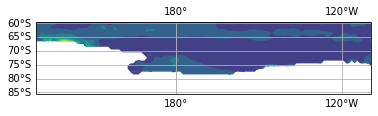

DimCoord([2036-12-16 12:00:00], bounds=[[2036-12-01 00:00:00, 2037-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


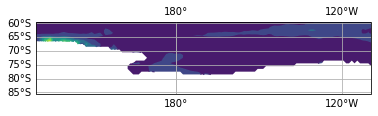

DimCoord([2037-12-16 12:00:00], bounds=[[2037-12-01 00:00:00, 2038-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


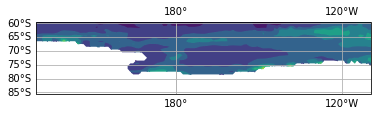

DimCoord([2038-12-16 12:00:00], bounds=[[2038-12-01 00:00:00, 2039-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


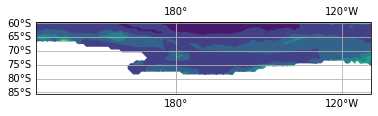

DimCoord([2039-12-16 12:00:00], bounds=[[2039-12-01 00:00:00, 2040-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


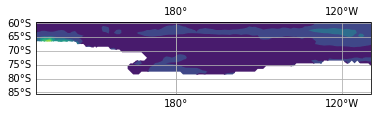

DimCoord([2040-12-16 12:00:00], bounds=[[2040-12-01 00:00:00, 2041-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


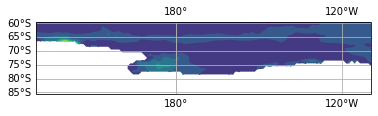

DimCoord([2041-12-16 12:00:00], bounds=[[2041-12-01 00:00:00, 2042-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


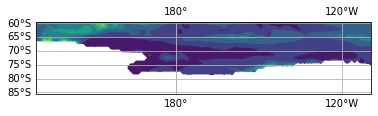

DimCoord([2042-12-16 12:00:00], bounds=[[2042-12-01 00:00:00, 2043-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


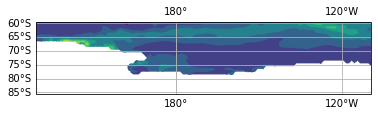

DimCoord([2043-12-16 12:00:00], bounds=[[2043-12-01 00:00:00, 2044-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


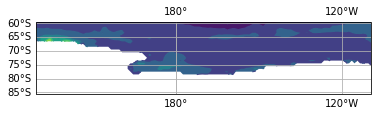

DimCoord([2044-12-16 12:00:00], bounds=[[2044-12-01 00:00:00, 2045-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


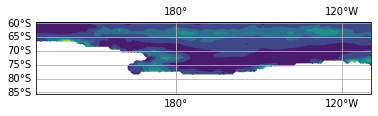

DimCoord([2045-12-16 12:00:00], bounds=[[2045-12-01 00:00:00, 2046-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


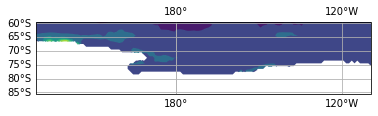

DimCoord([2046-12-16 12:00:00], bounds=[[2046-12-01 00:00:00, 2047-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


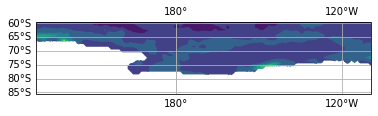

DimCoord([2047-12-16 12:00:00], bounds=[[2047-12-01 00:00:00, 2048-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


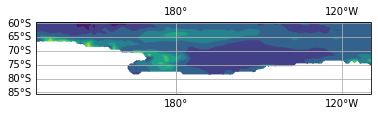

DimCoord([2048-12-16 12:00:00], bounds=[[2048-12-01 00:00:00, 2049-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


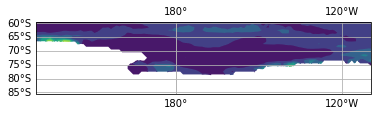

DimCoord([2049-12-16 12:00:00], bounds=[[2049-12-01 00:00:00, 2050-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


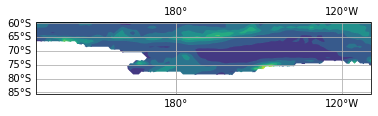

DimCoord([2050-12-16 12:00:00], bounds=[[2050-12-01 00:00:00, 2051-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


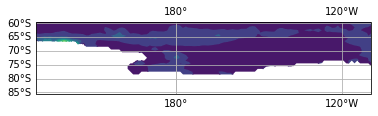

DimCoord([2051-12-16 12:00:00], bounds=[[2051-12-01 00:00:00, 2052-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


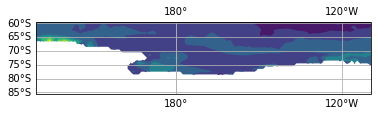

DimCoord([2052-12-16 12:00:00], bounds=[[2052-12-01 00:00:00, 2053-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


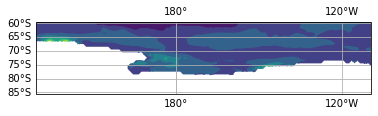

DimCoord([2053-12-16 12:00:00], bounds=[[2053-12-01 00:00:00, 2054-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


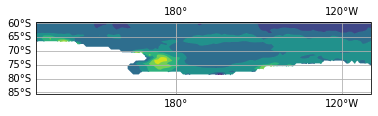

DimCoord([2054-12-16 12:00:00], bounds=[[2054-12-01 00:00:00, 2055-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


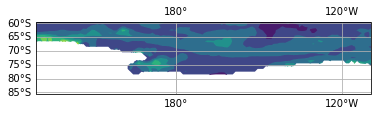

DimCoord([2055-12-16 12:00:00], bounds=[[2055-12-01 00:00:00, 2056-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


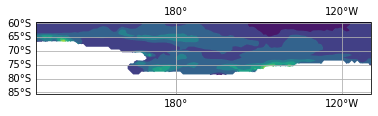

DimCoord([2056-12-16 12:00:00], bounds=[[2056-12-01 00:00:00, 2057-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


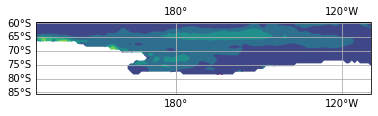

DimCoord([2057-12-16 12:00:00], bounds=[[2057-12-01 00:00:00, 2058-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


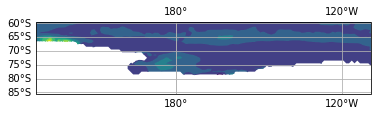

DimCoord([2058-12-16 12:00:00], bounds=[[2058-12-01 00:00:00, 2059-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


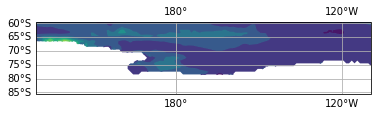

DimCoord([2059-12-16 12:00:00], bounds=[[2059-12-01 00:00:00, 2060-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


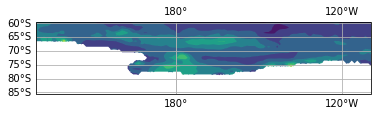

DimCoord([2060-12-16 12:00:00], bounds=[[2060-12-01 00:00:00, 2061-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


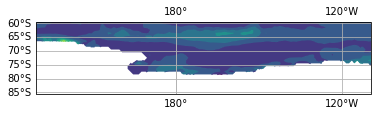

DimCoord([2061-12-16 12:00:00], bounds=[[2061-12-01 00:00:00, 2062-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


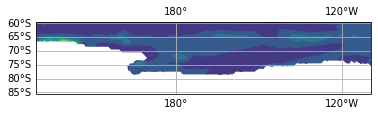

DimCoord([2062-12-16 12:00:00], bounds=[[2062-12-01 00:00:00, 2063-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


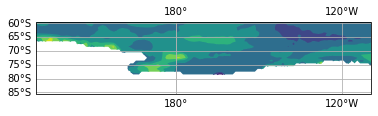

DimCoord([2063-12-16 12:00:00], bounds=[[2063-12-01 00:00:00, 2064-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


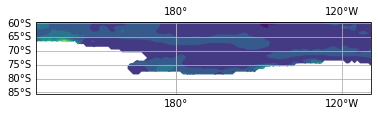

DimCoord([2064-12-16 12:00:00], bounds=[[2064-12-01 00:00:00, 2065-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


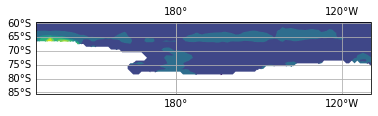

DimCoord([2065-12-16 12:00:00], bounds=[[2065-12-01 00:00:00, 2066-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


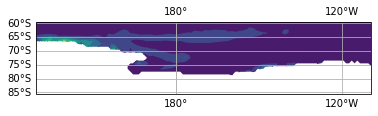

DimCoord([2066-12-16 12:00:00], bounds=[[2066-12-01 00:00:00, 2067-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


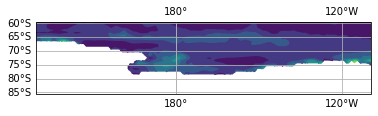

DimCoord([2067-12-16 12:00:00], bounds=[[2067-12-01 00:00:00, 2068-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


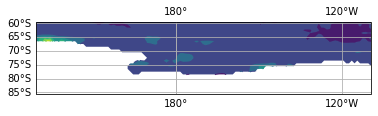

DimCoord([2068-12-16 12:00:00], bounds=[[2068-12-01 00:00:00, 2069-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


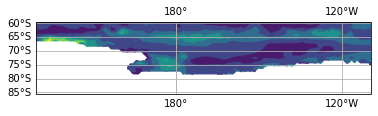

DimCoord([2069-12-16 12:00:00], bounds=[[2069-12-01 00:00:00, 2070-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


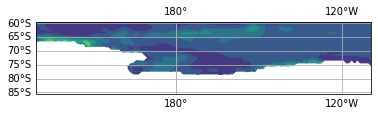

DimCoord([2070-12-16 12:00:00], bounds=[[2070-12-01 00:00:00, 2071-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


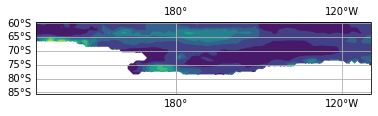

DimCoord([2071-12-16 12:00:00], bounds=[[2071-12-01 00:00:00, 2072-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


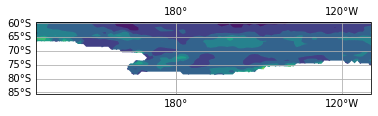

DimCoord([2072-12-16 12:00:00], bounds=[[2072-12-01 00:00:00, 2073-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


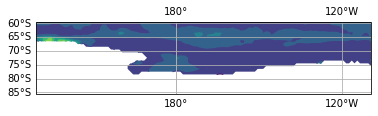

DimCoord([2073-12-16 12:00:00], bounds=[[2073-12-01 00:00:00, 2074-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


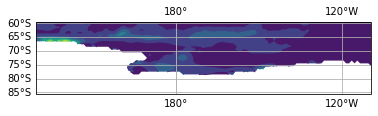

DimCoord([2074-12-16 12:00:00], bounds=[[2074-12-01 00:00:00, 2075-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


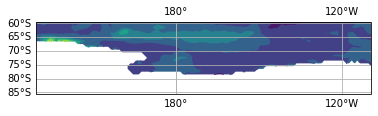

DimCoord([2075-12-16 12:00:00], bounds=[[2075-12-01 00:00:00, 2076-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


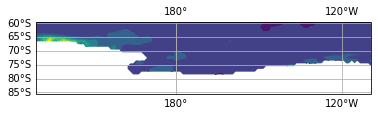

DimCoord([2076-12-16 12:00:00], bounds=[[2076-12-01 00:00:00, 2077-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


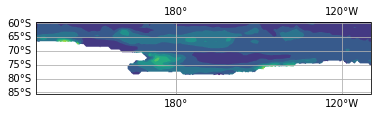

DimCoord([2077-12-16 12:00:00], bounds=[[2077-12-01 00:00:00, 2078-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


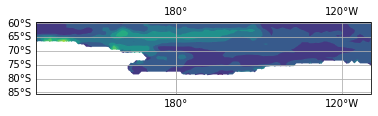

DimCoord([2078-12-16 12:00:00], bounds=[[2078-12-01 00:00:00, 2079-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


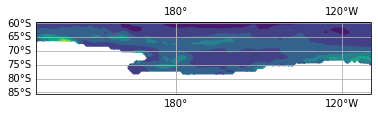

DimCoord([2079-12-16 12:00:00], bounds=[[2079-12-01 00:00:00, 2080-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


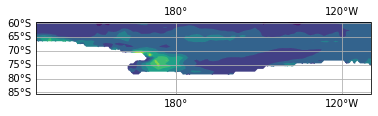

DimCoord([2080-12-16 12:00:00], bounds=[[2080-12-01 00:00:00, 2081-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


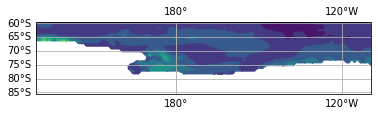

DimCoord([2081-12-16 12:00:00], bounds=[[2081-12-01 00:00:00, 2082-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


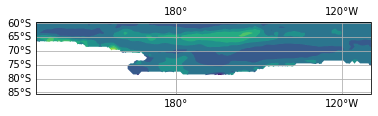

DimCoord([2082-12-16 12:00:00], bounds=[[2082-12-01 00:00:00, 2083-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


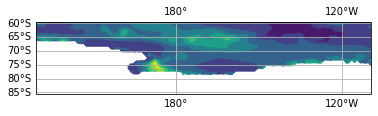

DimCoord([2083-12-16 12:00:00], bounds=[[2083-12-01 00:00:00, 2084-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


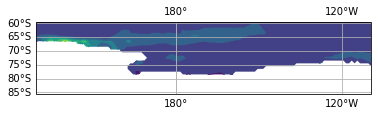

DimCoord([2084-12-16 12:00:00], bounds=[[2084-12-01 00:00:00, 2085-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


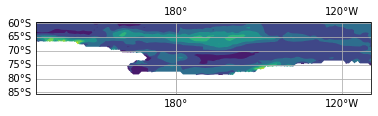

DimCoord([2085-12-16 12:00:00], bounds=[[2085-12-01 00:00:00, 2086-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


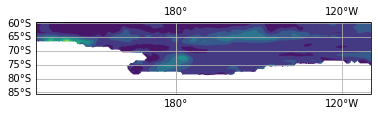

DimCoord([2086-12-16 12:00:00], bounds=[[2086-12-01 00:00:00, 2087-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


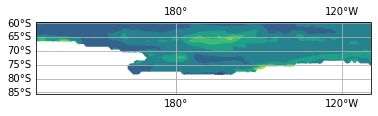

DimCoord([2087-12-16 12:00:00], bounds=[[2087-12-01 00:00:00, 2088-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


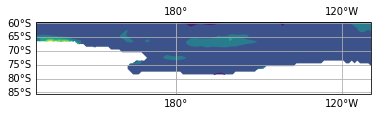

DimCoord([2088-12-16 12:00:00], bounds=[[2088-12-01 00:00:00, 2089-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


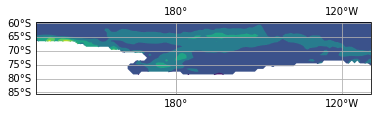

DimCoord([2089-12-16 12:00:00], bounds=[[2089-12-01 00:00:00, 2090-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


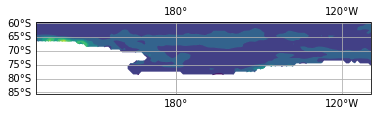

DimCoord([2090-12-16 12:00:00], bounds=[[2090-12-01 00:00:00, 2091-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


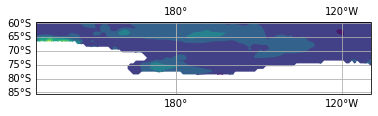

DimCoord([2091-12-16 12:00:00], bounds=[[2091-12-01 00:00:00, 2092-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


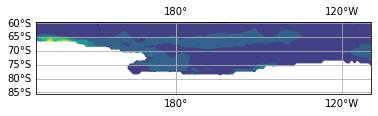

DimCoord([2092-12-16 12:00:00], bounds=[[2092-12-01 00:00:00, 2093-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


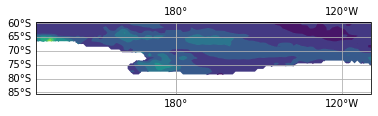

DimCoord([2093-12-16 12:00:00], bounds=[[2093-12-01 00:00:00, 2094-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


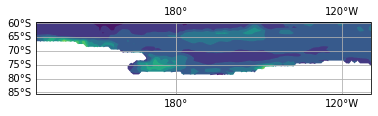

DimCoord([2094-12-16 12:00:00], bounds=[[2094-12-01 00:00:00, 2095-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


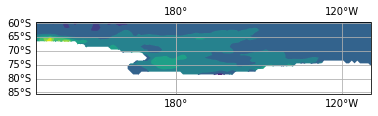

DimCoord([2095-12-16 12:00:00], bounds=[[2095-12-01 00:00:00, 2096-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


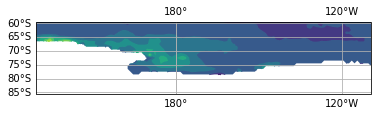

DimCoord([2096-12-16 12:00:00], bounds=[[2096-12-01 00:00:00, 2097-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


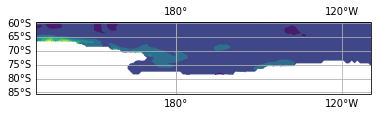

DimCoord([2097-12-16 12:00:00], bounds=[[2097-12-01 00:00:00, 2098-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


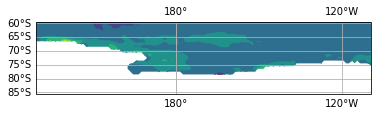

DimCoord([2098-12-16 12:00:00], bounds=[[2098-12-01 00:00:00, 2099-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


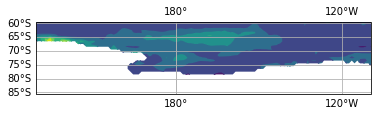

DimCoord([2099-12-16 12:00:00], bounds=[[2099-12-01 00:00:00, 2100-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


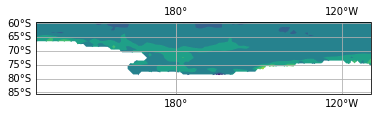

DimCoord([2100-12-16 12:00:00], bounds=[[2100-12-01 00:00:00, 2101-01-01 00:00:00]], standard_name='time', calendar='365_day', long_name='time', var_name='time')


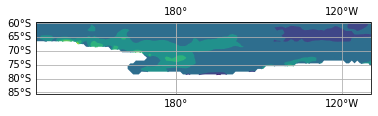

In [9]:
for i in range (0,2101-2015):
    fgcube3=fgcube2[i,:,:]
    west = -230
    east = -110
    south = -85
    north = -60
    fg_temporary_cube = fgcube3.intersection(longitude = (west, east)) 
    fg_regional_cube = fg_temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
    my_plot = iplt.contourf(fg_regional_cube)
    plt.gca().gridlines(draw_labels=True)
    print(fgcube3.coord('time'))
    plt.show()
    

In [32]:
for i in range (0,2101-2015):
    fgcube3=fgcube2[i,:,:]
    cube_out = iris.analysis.maths.multiply(regional_cube,fgcube3)
    print(cube_out)

ValueError: Cannot resolve cubes, as a suitable transpose of the RHS cube 'surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon' will not broadcast with the LHS cube 'sea_ice_area_fraction'.

In [33]:
results = iris.common.resolve.Resolve(regional_cube, fgcube3)

ValueError: Cannot resolve cubes, as a suitable transpose of the RHS cube 'surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon' will not broadcast with the LHS cube 'sea_ice_area_fraction'.